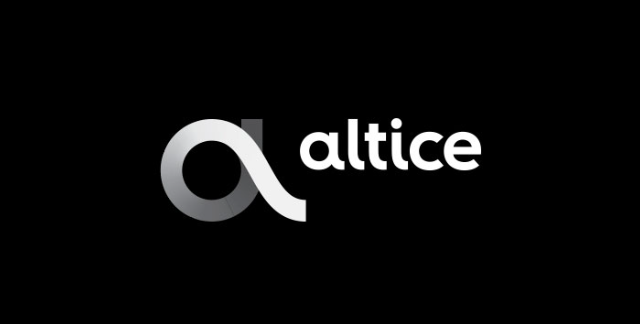


📊 Análise Exploratória de Dados (EDA)

Pipeline de Análise de Dados - Projeto Altice

Introdução

Este documento descreve o pipeline de análise de dados para o projeto Altice, incluindo as etapas de extração, transformação e carga (ETL), bem como a exploração dos dados através de análises estatísticas e visualizações.

1. Extração dos Dados

Os dados serão carregados a partir de arquivos CSV armazenados localmente:

dim_cidades.csv: Contém informações sobre as cidades atendidas.

dim_produtos.csv: Lista de produtos disponíveis para venda.

dim_clientes.csv: Dados dos clientes.

fato_vendas_ajustado.csv: Contém os registros das vendas realizadas.

2. Análise Exploratória dos Dados (EDA)

A EDA é essencial para entender a estrutura dos dados e identificar padrões, anomalias e inconsistências. Serão realizadas as seguintes análises:

2.1 Análise Inicial dos Dados

Verificação da estrutura dos DataFrames (tipos de dados, valores nulos, distribuição estatística);

Descrição estatística das variáveis numéricas e categóricas;

Identificação de possíveis outliers e inconsistências.

2.2 Distribuição dos Clientes por Cidade

Criação de um gráfico de barras para visualizar a quantidade de clientes por cidade.

Análise de cidades com maior e menor presença de clientes.

2.3 Distribuição das Vendas por Produto

Construção de um gráfico de barras para visualizar a quantidade de vendas por produto.

Identificação dos produtos mais vendidos.

2.4 Análise de Vendas ao Longo do Tempo

Conversão da coluna de datas para formato datetime;

Criação de uma série temporal mostrando a evolução das vendas ao longo do tempo;

Identificação de tendências sazonais ou picos de vendas.

2.5 Análise de Preços dos Produtos

Construção de um boxplot para visualizar a distribuição de preços por produto;

Identificação de variações nos preços e possíveis outliers.

3. Pipeline de Processamento e ETL

O pipeline de processamento seguirá as seguintes etapas:

Extração: Carregamento dos arquivos CSV;

Transformação:

Limpeza dos dados (remoção de valores nulos, conversão de tipos);

Criação de colunas derivadas (exemplo: categorizando faixas de preço dos produtos);

Agregação dos dados para análise de vendas ao longo do tempo.

Carga:

Geração de relatórios e visualizações;

Criação de um dashboard interativo no Power BI para monitoramento das vendas.

4. Próximos Passos

Implementação de uma solução automatizada de ETL em Python.

Construção de um dashboard interativo para tomada de decisão.

Aplicação de análises preditivas para previsão de vendas.

Esse pipeline servirá como base para estruturação do projeto, garantindo uma análise eficiente e automatizada dos dados da Altice.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cidade     10 non-null     object
 1   populacao  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   produto  8 non-null      object
 1   min      8 non-null      int64 
 2   max      8 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 324.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cliente_id  10000 non-null  object
 1   nome        10000 non-null  object
 2   cidade      10000 non-null  object
dtypes: object(3)
memory usage:

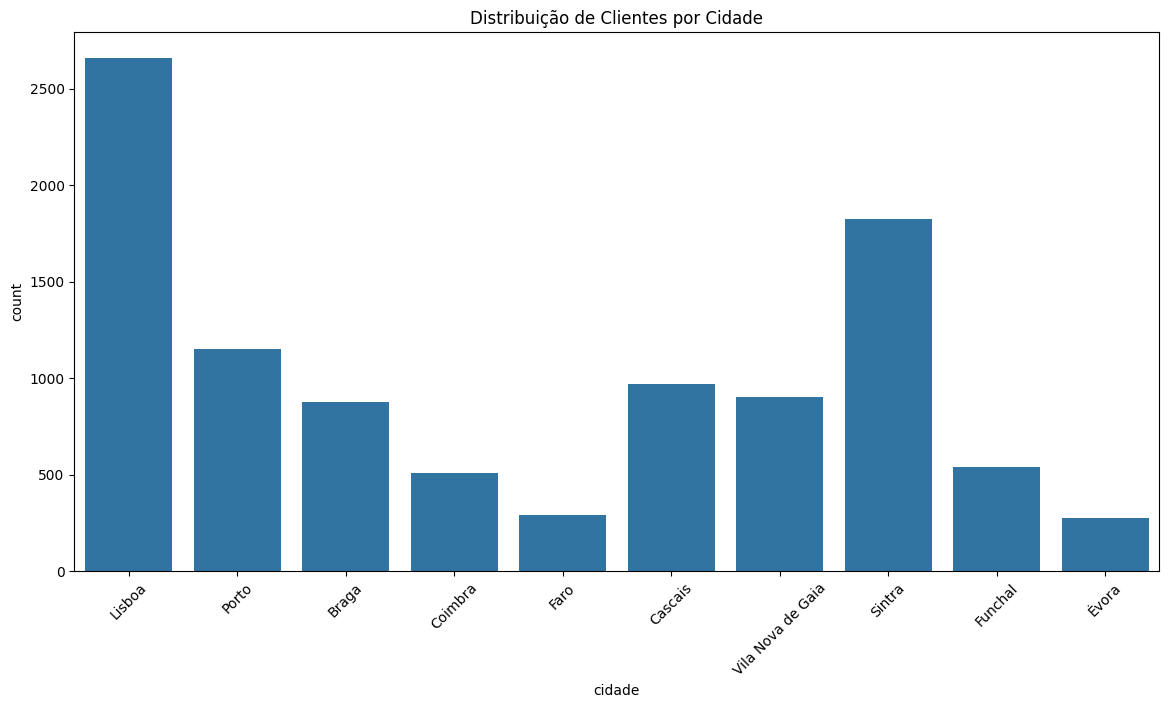

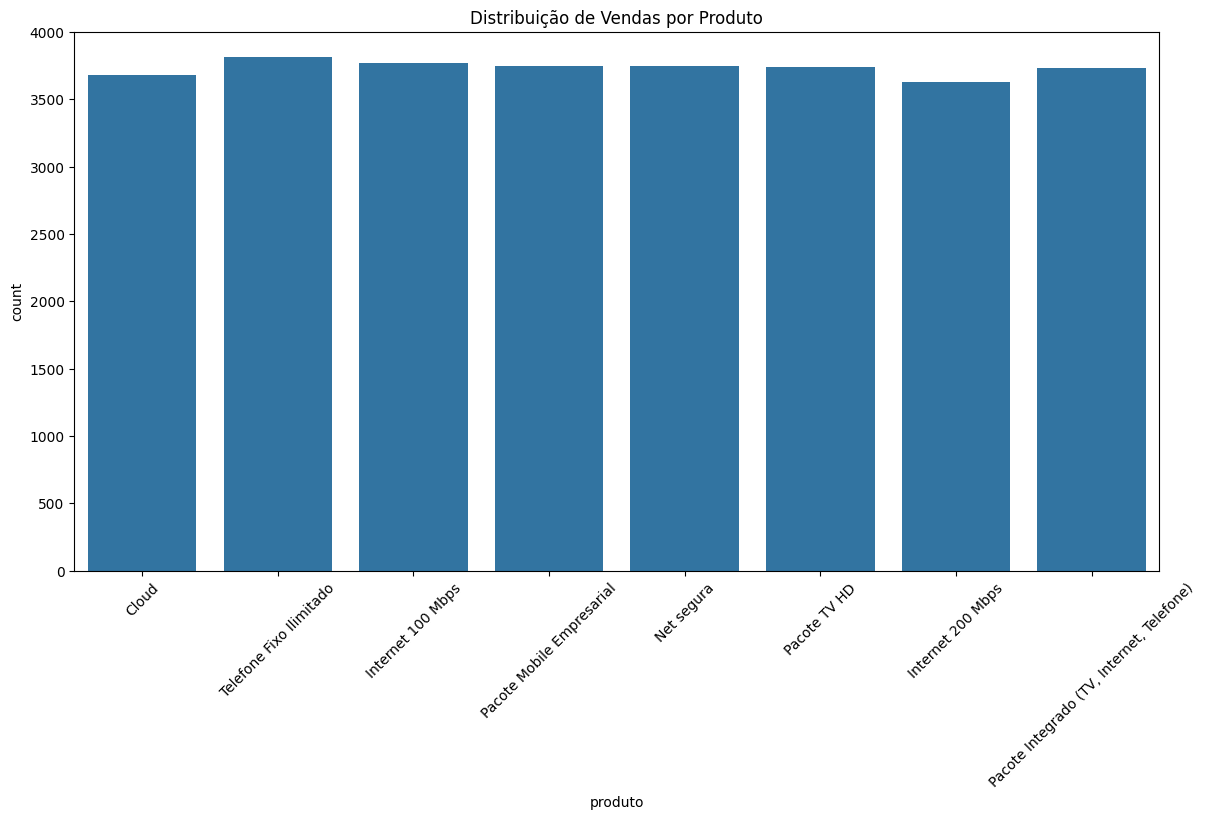

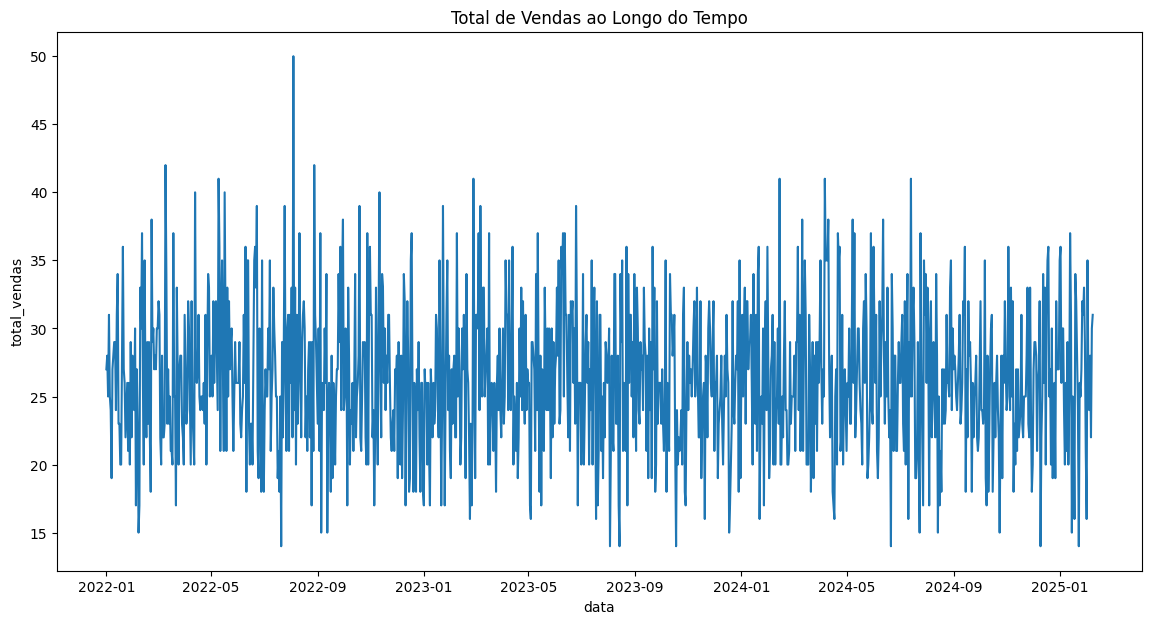

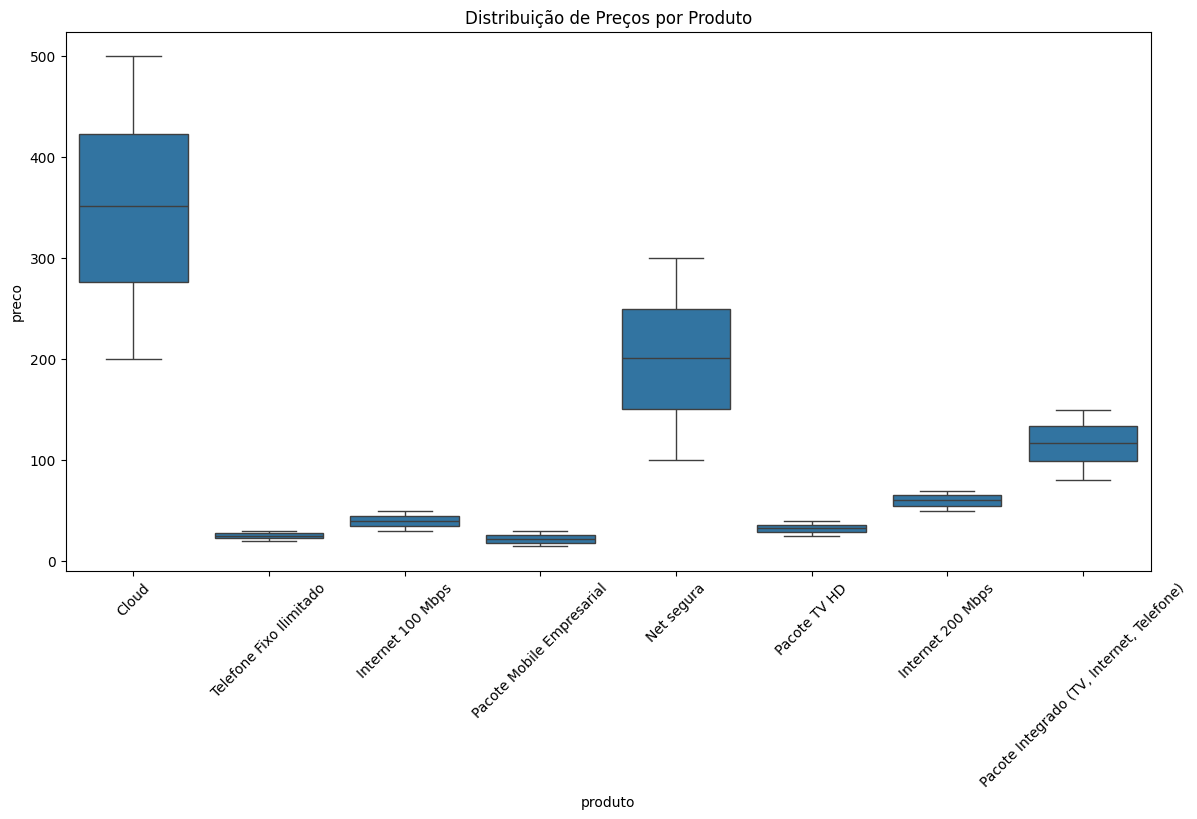

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caminhos exatos dos arquivos CSV
caminho_cidades = r'C:\Users\alexm\Documents\Altice_DataAnalyst\dim_cidades.csv'
caminho_produtos = r'C:\Users\alexm\Documents\Altice_DataAnalyst\dim_produtos.csv'
caminho_clientes = r'C:\Users\alexm\Documents\Altice_DataAnalyst\dim_clientes.csv'
caminho_vendas = r'C:\Users\alexm\Documents\Altice_DataAnalyst\fato_vendas_ajustado.csv'  # Caminho atualizado

# Carregar os dados
df_cidades = pd.read_csv(caminho_cidades, sep=';')
df_produtos = pd.read_csv(caminho_produtos, sep=';')
df_clientes = pd.read_csv(caminho_clientes, sep=';')
df_vendas = pd.read_csv(caminho_vendas, sep=';')

# Análise básica
print(df_cidades.info())
print(df_produtos.info())
print(df_clientes.info())
print(df_vendas.info())

print(df_cidades.describe())
print(df_produtos.describe())
print(df_clientes.describe())
print(df_vendas.describe())

# Análise de distribuições
plt.figure(figsize=(14, 7))
sns.countplot(x='cidade', data=df_clientes, order=df_cidades['cidade'])
plt.xticks(rotation=45)
plt.title('Distribuição de Clientes por Cidade')
plt.show()

plt.figure(figsize=(14, 7))
sns.countplot(x='produto', data=df_vendas)
plt.xticks(rotation=45)
plt.title('Distribuição de Vendas por Produto')
plt.show()

# Análise de vendas ao longo do tempo
df_vendas['data'] = pd.to_datetime(df_vendas['data'], format='%Y-%m-%d')  # Ajustando o formato da data
vendas_por_data = df_vendas.groupby('data').size().reset_index(name='total_vendas')

plt.figure(figsize=(14, 7))
sns.lineplot(x='data', y='total_vendas', data=vendas_por_data)
plt.title('Total de Vendas ao Longo do Tempo')
plt.show()

# Análise de preços de produtos
plt.figure(figsize=(14, 7))
sns.boxplot(x='produto', y='preco', data=df_vendas)
plt.xticks(rotation=45)
plt.title('Distribuição de Preços por Produto')
plt.show()
